<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/8-2%ED%95%A9%EC%84%B1%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [2]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

### 첫번째 합성곱 층

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2)) # 기본적으로 2 by 2 사용

### 두번째 합성곱 층

In [4]:
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', ))
model.add(MaxPooling2D(2))

#### Fully Connected Layer (완전 연결층)

In [5]:
model.add(Flatten(input_shape=()))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

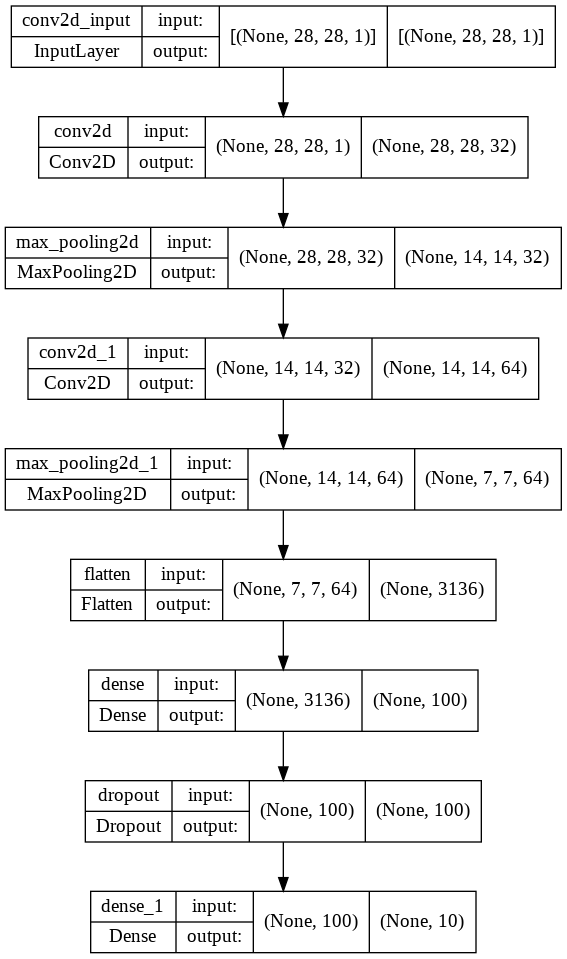

In [7]:
plot_model(model, show_shapes=True)
# plot_model(model)

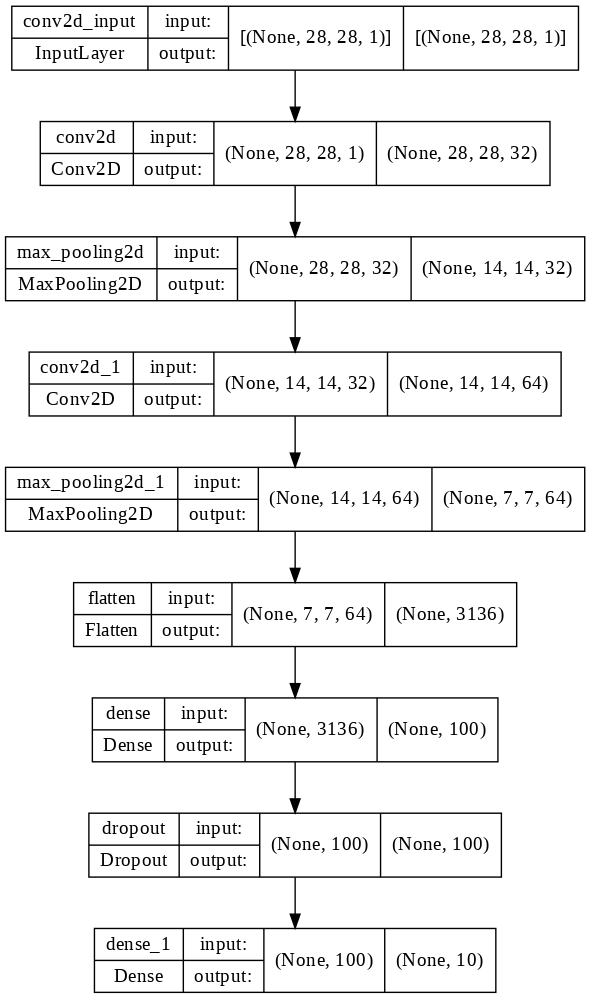

In [8]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

## 모델 컴파일과 훈련

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [10]:
checkpoint_cb = ModelCheckpoint('best_cnn_model.h5', monitor='val_loss')

In [11]:
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

In [12]:
history = model.fit(train_scaled, train_target, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb],
          epochs=20,
          verbose=1)

Epoch 1/20
1500/1500 [==============================] - 22s 7ms/step - loss: 0.5188 - accuracy: 0.8127 - val_loss: 0.3365 - val_accuracy: 0.8764
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3409 - accuracy: 0.8757 - val_loss: 0.2687 - val_accuracy: 0.9014
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2946 - accuracy: 0.8941 - val_loss: 0.2560 - val_accuracy: 0.9058
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2621 - accuracy: 0.9047 - val_loss: 0.2360 - val_accuracy: 0.9119
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2385 - accuracy: 0.9136 - val_loss: 0.2468 - val_accuracy: 0.9056
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2180 - accuracy: 0.9204 - val_loss: 0.2249 - val_accuracy: 0.9172
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2023 - accuracy: 0.9249 - val_loss: 0.2358 - val_ac

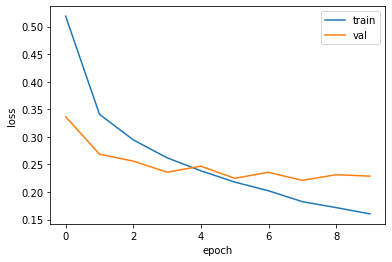

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
print(f'best_epoch: {early_stopping_cb.best_epoch}, stopped_epoch: {early_stopping_cb.stopped_epoch}')

best_epoch: 7, stopped_epoch: 9


In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2212 - accuracy: 0.9199


[0.22120650112628937, 0.9199166893959045]

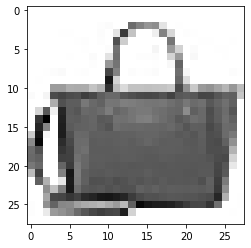

In [16]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[6.1089588e-13 8.9339559e-19 1.6145332e-15 5.1847042e-17 4.9649425e-15
  4.0828199e-15 2.2821331e-13 2.3631778e-17 1.0000000e+00 6.6582508e-19]]


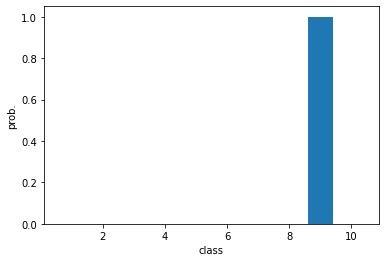

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [20]:
print(classes[np.argmax(preds)])

가방


#### test model

In [21]:
test_scaled = test_input.reshape(-1,28,28,1) / 255
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2457 - accuracy: 0.9155


[0.24572062492370605, 0.9154999852180481]